# The Evolution of Popular Music: A Data-Driven Exploration (2000-2023)

Music is a universal language that transcends borders and cultures, creating shared experiences and evoking a myriad of emotions. Just as the world around us evolves, so too does the music that forms its soundtrack. The past two decades have seen significant changes in the music landscape, shaped by technological advancements, shifts in listener preferences, and the creativity of artists pushing the boundaries of what music can be.

In this data-driven exploration, we delve into a dataset of the "Best Songs on Spotify from 2000-2023" to uncover the trends and changes in popular music over this period. This dataset offers a rich tapestry of information, including song titles, artists, genres, and a range of characteristics such as tempo, energy, danceability, and popularity.

In [6]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Load the data again, specifying the correct delimiter
df = pd.read_csv('Data/Best Songs on Spotify from 2000-2023.csv', delimiter=';', error_bad_lines=False)

# Display the first few rows of the dataset
df.head()

,title,artist,top genre,year,bpm,energy,danceability,dB,liveness,valence,duration,acousticness,speechiness,popularity
0,Flowers,Miley Cyrus,pop,2023,118,68,71,-4,3,65,200,6,7,98
1,Cupid - Twin Ver.,FIFTY FIFTY,k-pop girl group,2023,120,59,78,-8,35,73,174,44,3,97
2,BESO,ROSALÍA,pop,2023,95,64,77,-7,17,53,195,74,14,96
3,Boy's a liar Pt. 2,PinkPantheress,bronx drill,2023,133,81,70,-8,25,86,131,25,5,96
4,Creepin' (with The Weeknd & 21 Savage),Metro Boomin,rap,2022,98,62,72,-6,8,17,222,42,5,96


- **title**: Title of the song.
- **artist**: Name of the artist.
- **top genre**: The genre of the song.
- **year**: The year the song was released.
- **bpm**: Beats per minute of the song.
- **energy**: A measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.
- **danceability**: Describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity.
- **dB**: The overall loudness of a track in decibels (dB).
- **liveness**: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.
- **valence**: A measure describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g., happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g., sad, depressed, angry).
- **duration**: The duration of the song in seconds.
- **acousticness**: A measure of whether the track is acoustic.
- **speechiness**: Speechiness detects the presence of spoken words in a track.
- **popularity**: The popularity of the song.

In [7]:
# Check for missing values
missing_values = df.isnull().sum()

# Display distribution of genres
genre_distribution = df['top genre'].value_counts()

missing_values, genre_distribution

(title            0
 artist           0
 top genre        0
 year             0
 bpm              0
 energy           0
 danceability     0
 dB               0
 liveness         0
 valence          0
 duration         0
 acousticness     0
 speechiness      0
 popularity       0
 dtype: int64,
 dance pop                      460
 pop                            250
 atl hip hop                     95
 alternative metal               55
 edm                             54
                               ... 
 romanian pop                     1
 nyc pop                          1
 canadian old school hip hop      1
 alternative r&b                  1
 dalarna indie                    1
 Name: top genre, Length: 266, dtype: int64)

In [9]:
# Remove leading and trailing spaces from column names
df.columns = df.columns.str.strip()

# Check column names again
df.columns

Index(['title', 'artist', 'top genre', 'year', 'bpm', 'energy', 'danceability',
       'dB', 'liveness', 'valence', 'duration', 'acousticness', 'speechiness',
       'popularity'],
      dtype='object')

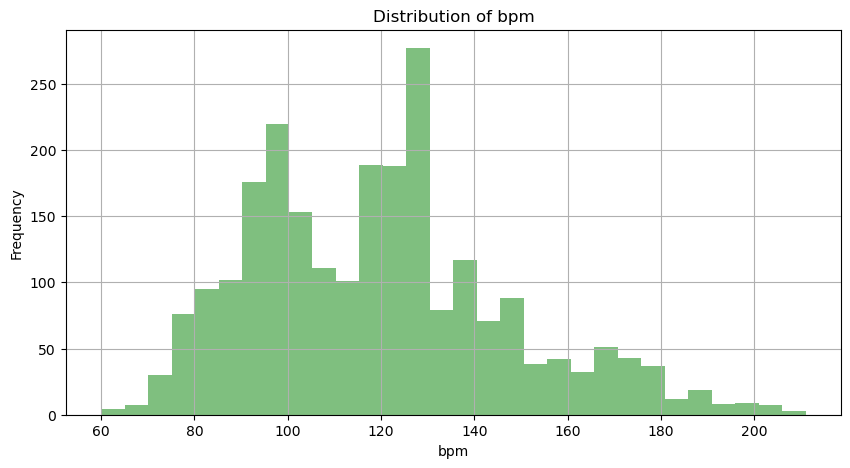

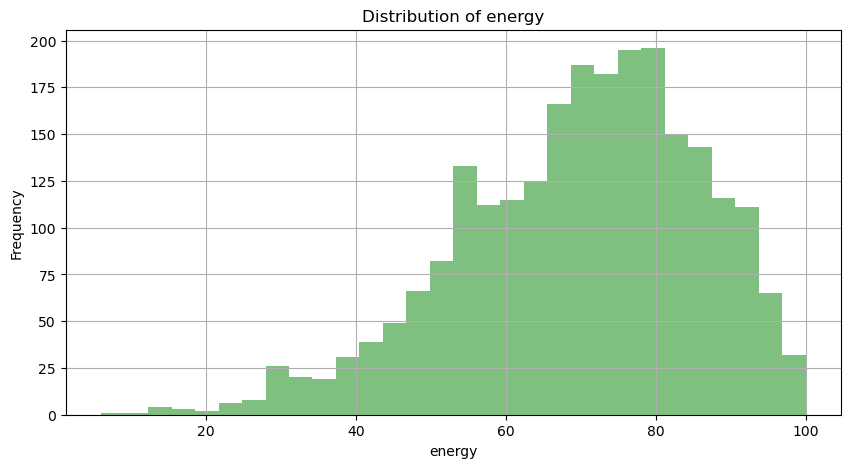

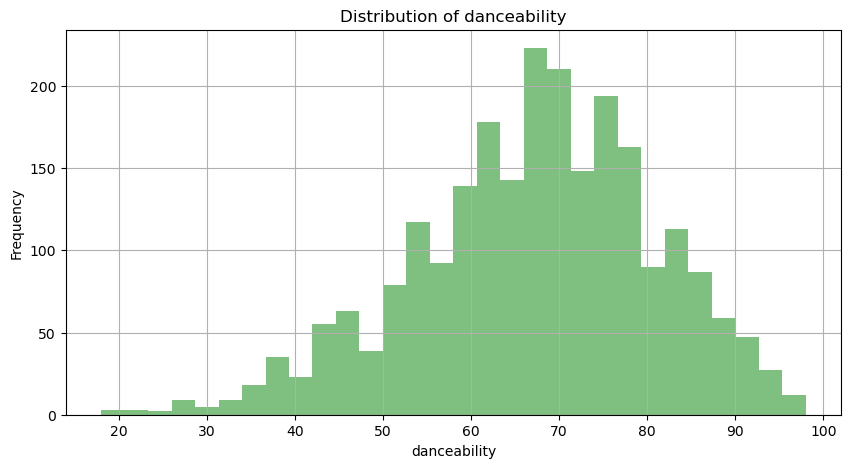

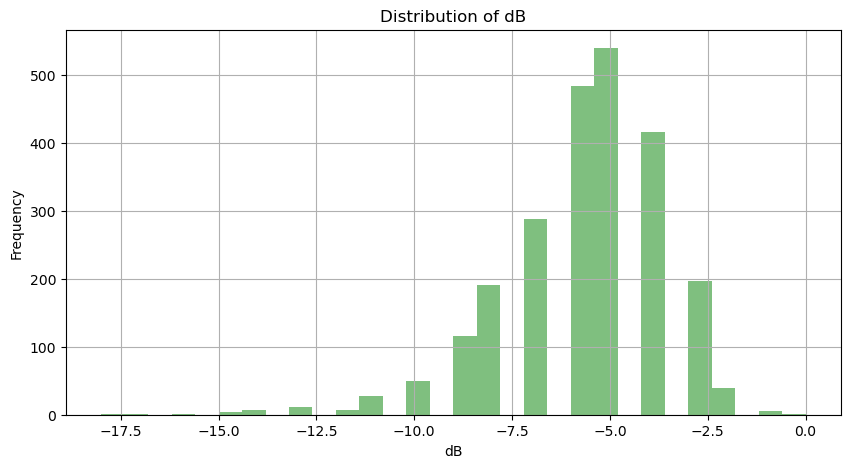

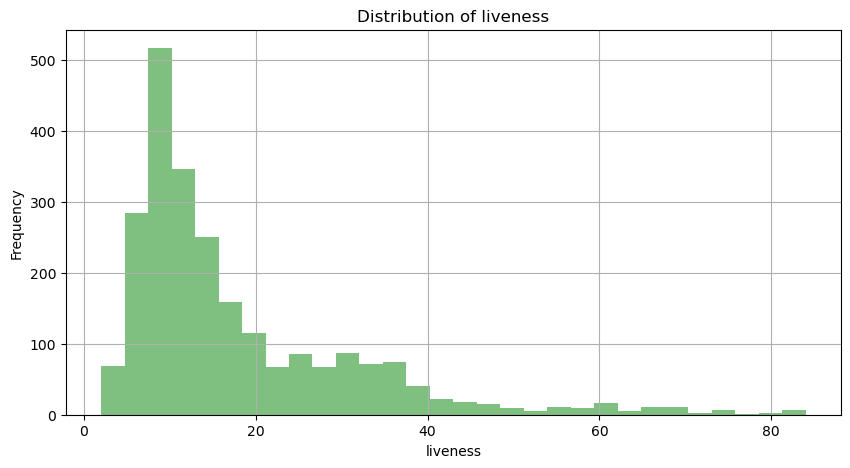

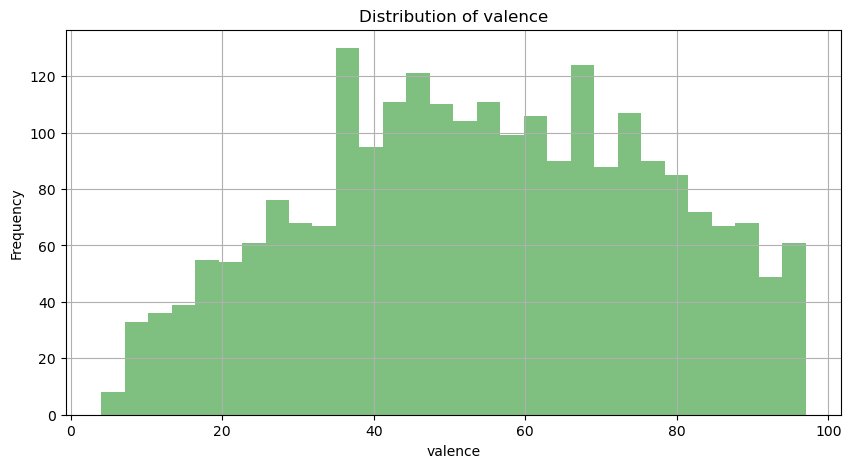

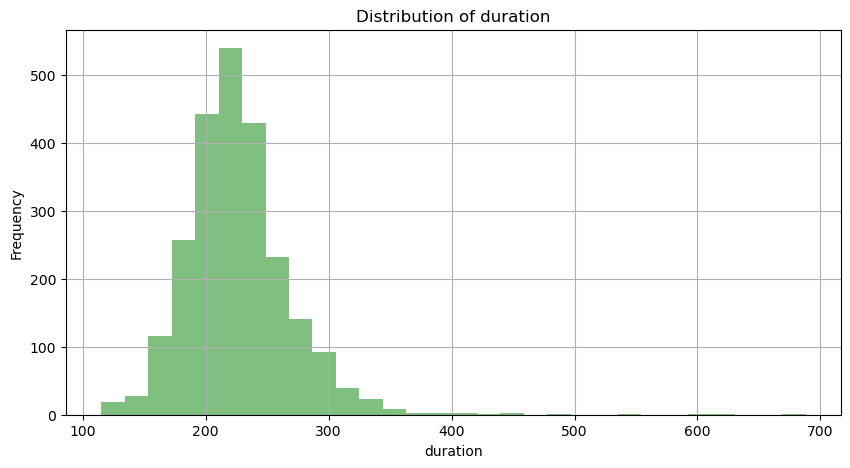

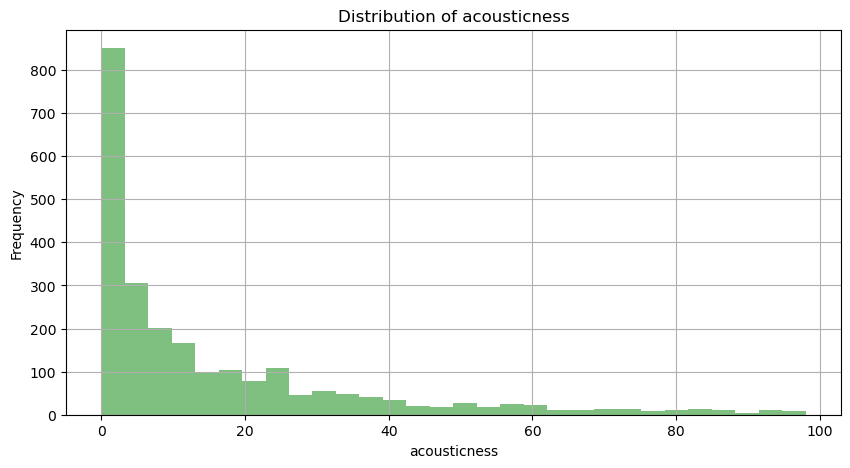

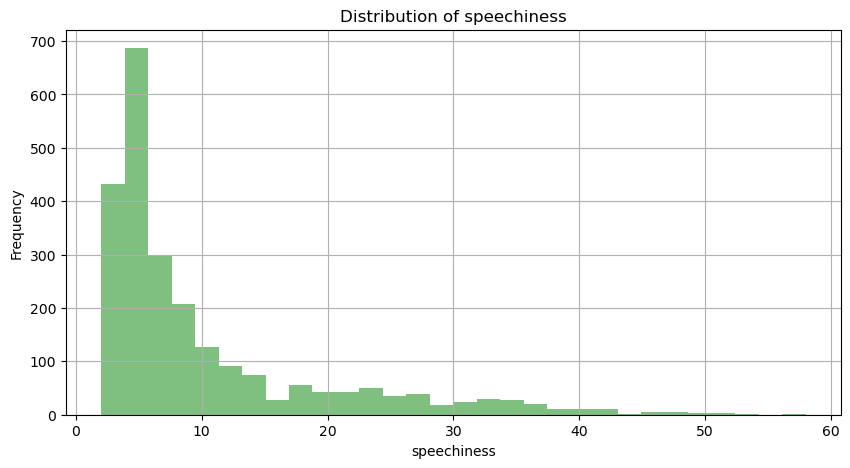

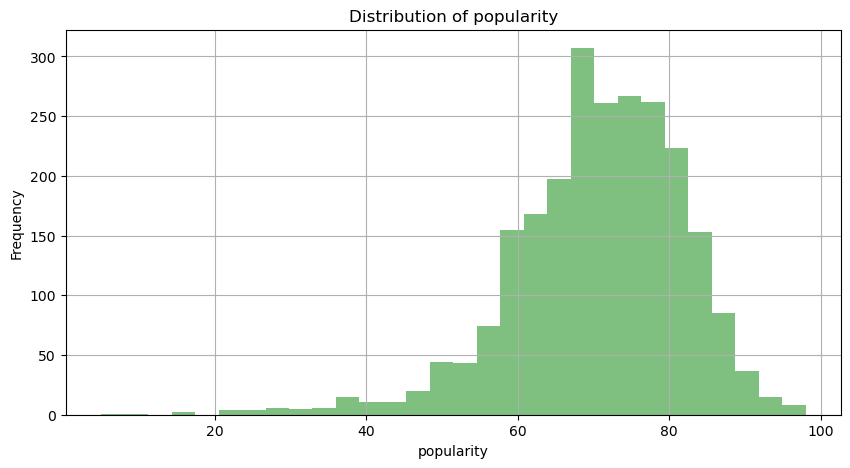

In [10]:
import matplotlib.pyplot as plt

# List of numerical features
numerical_features = ['bpm', 'energy', 'danceability', 'dB', 'liveness', 'valence', 'duration', 'acousticness', 'speechiness', 'popularity']

# Create histogram for each numerical feature
for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    plt.hist(df[feature], bins=30, alpha=0.5, color='g')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


These histograms give us a good idea of the distribution of each numerical feature in the dataset. Here are some observations:

- bpm (Beats Per Minute): Most songs have a bpm around 100 to 130, which is typical for pop and dance music.

- energy: The energy level of songs is mostly high, indicating that the songs are intense, fast, and noisy.

- danceability: A large number of songs have high danceability scores, suggesting that they are suitable for dancing.

- dB (Decibel): The loudness of most songs is between -10 and -5 dB.

- liveness: Most songs have low liveness scores, meaning they were likely not recorded live.

- valence: Valence, or musical positiveness, shows a wide distribution, meaning we have a mix of songs that sound more positive (happy, cheerful, euphoric) and those that sound more negative (sad, depressed, angry).

- duration: Most songs are between 150 and 250 seconds long, which is about 2.5 to 4 minutes.

- acousticness: Most songs have low acousticness scores, suggesting that they are not acoustic.

- speechiness: Most songs have low speechiness scores, indicating that they have more music than spoken words.

- popularity: The popularity of songs is mostly high, which makes sense given that the dataset includes the "best songs" on Spotify.

In [11]:
# Calculate yearly averages for some features
yearly_averages = df.groupby('year')[['bpm', 'energy', 'danceability', 'valence', 'duration', 'acousticness', 'speechiness', 'popularity']].mean()

# Display the yearly averages
yearly_averages

,bpm,energy,danceability,valence,duration,acousticness,speechiness,popularity
year,,,,,,,,
1985,108.000000,55.000000,63.000000,19.000000,299.000000,72.000000,5.000000,86.000000
1996,110.000000,86.000000,77.000000,89.000000,173.000000,10.000000,3.000000,82.000000
1997,121.000000,86.000000,75.666667,84.333333,220.666667,6.333333,4.333333,72.666667
1998,81.000000,45.000000,73.000000,53.000000,215.000000,34.000000,29.000000,52.000000
1999,120.829268,75.682927,68.390244,62.975610,244.268293,14.341463,8.024390,70.317073
2000,117.094595,74.716216,69.432432,65.162162,248.256757,11.229730,8.729730,66.162162
2001,117.283186,73.876106,68.221239,67.522124,243.849558,11.539823,10.778761,65.247788
2002,115.311828,71.301075,65.602151,56.279570,250.559140,15.150538,11.172043,66.430108
2003,117.719512,71.597561,67.024390,61.926829,237.463415,17.804878,12.536585,67.170732


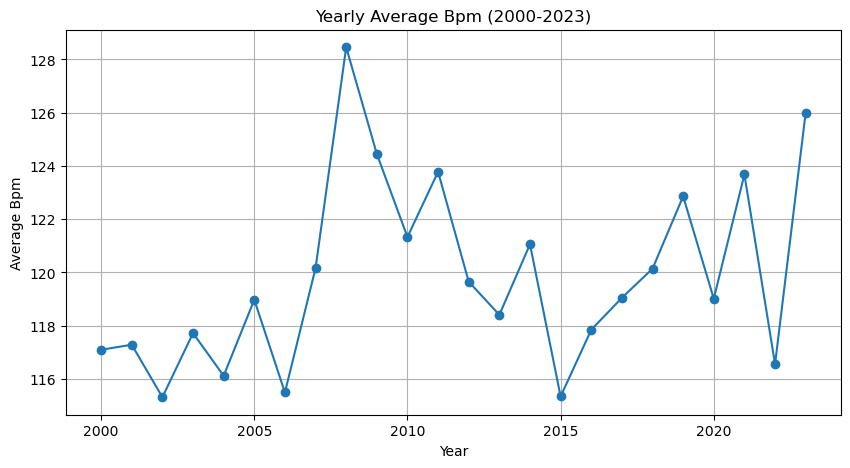

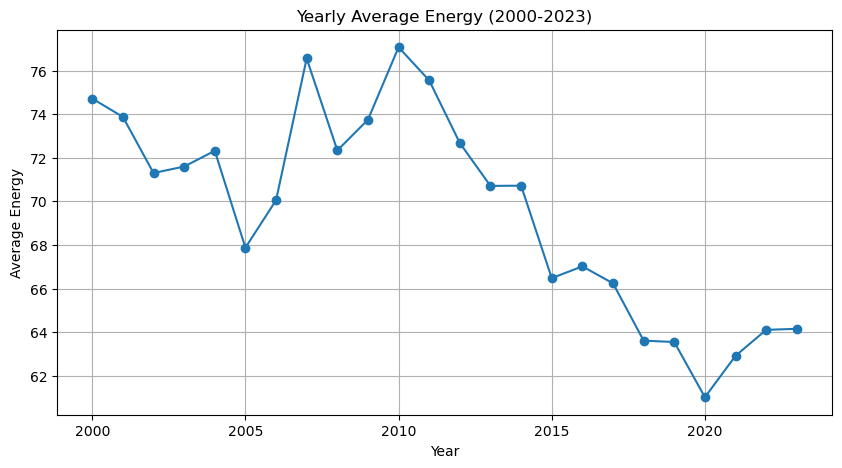

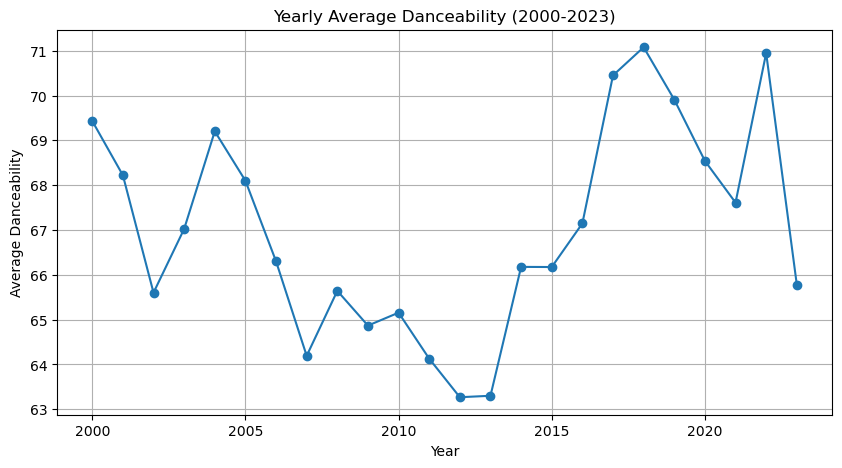

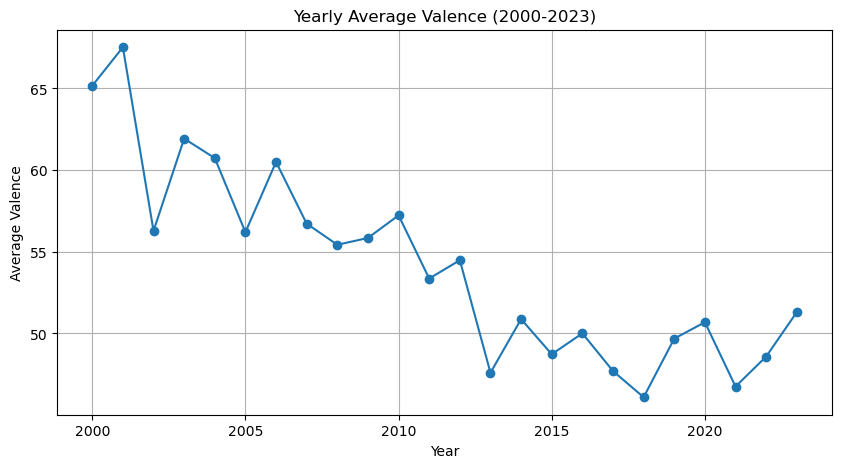

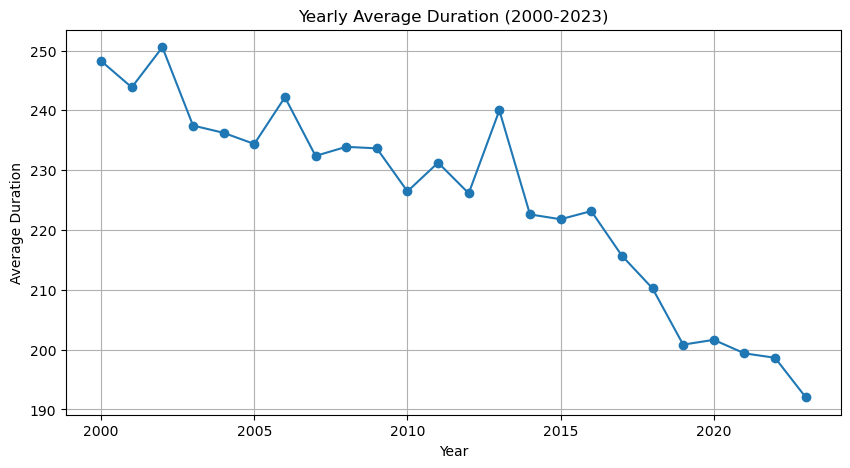

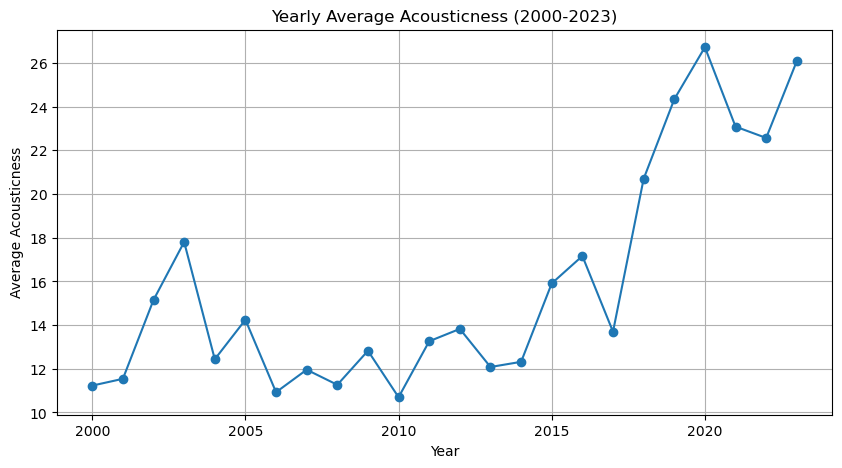

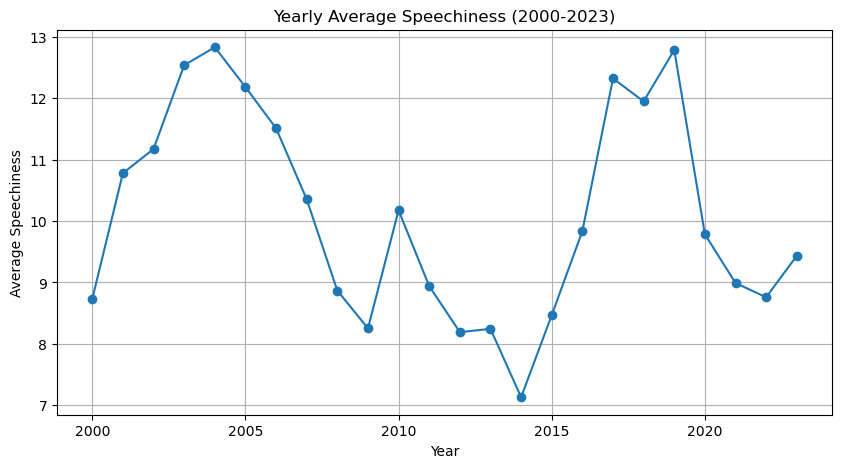

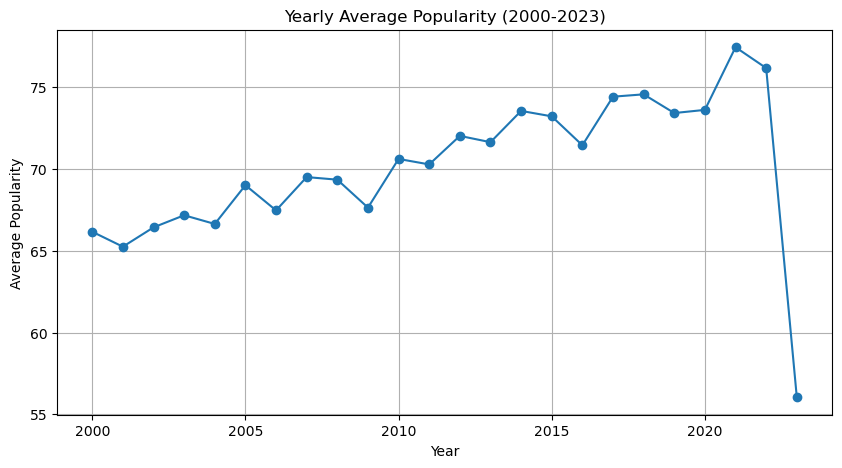

In [13]:
# Filter the yearly_averages DataFrame to only include years from 2000 to 2023
yearly_averages_filtered = yearly_averages.loc[2000:2023]

# Create line plots for the yearly averages of the features
for feature in ['bpm', 'energy', 'danceability', 'valence', 'duration', 'acousticness', 'speechiness', 'popularity']:
    plt.figure(figsize=(10, 5))
    plt.plot(yearly_averages_filtered.index, yearly_averages_filtered[feature], marker='o')
    plt.title(f'Yearly Average {feature.capitalize()} (2000-2023)')
    plt.xlabel('Year')
    plt.ylabel(f'Average {feature.capitalize()}')
    plt.grid(True)
    plt.show()

The line plots now provide a clear visualization of how the characteristics of popular music have evolved from 2000 to 2023. Here are some key observations:

- BPM (Beats Per Minute): The average BPM has fluctuated over the years, with no clear trend. This suggests that the tempo of popular music has varied quite a bit.
- Energy: The energy level of songs shows a downward trend, indicating that popular songs have become less intense and noisy.
- Danceability: Danceability has shown a slight upward trend, suggesting that songs have become more suitable for dancing.
- Valence (Musical Positiveness): The valence of songs shows a downward trend, indicating that songs have become less positive and possibly more complex in emotions.
- Duration: Song duration has a clear downward trend, indicating a trend towards shorter songs.
- Acousticness: There's an upward trend in acousticness, suggesting that popular songs have become more acoustic over time.
- Speechiness: The speechiness level of songs has slightly decreased, suggesting a minor reduction in the presence of spoken words in songs.
- Popularity: The popularity of songs has generally increased over the years, which could be due to Spotify's growing user base.

# Conclusion

The evolution of popular music from 2000 to 2023 shows trends towards lower energy and valence, higher danceability and acousticness, and shorter duration. These trends might reflect changes in listener preferences and the evolution of music production techniques. However, the trends observed here are specific to the songs included in the dataset, which are the "best songs" on Spotify from 2000-2023. Different trends might be observed in other collections of songs.

This analysis provides a data-driven narrative of how popular music has changed over time, but it's important to note that music is a complex and subjective art form that can't be fully captured by numerical features alone. The true essence of music lies in its ability to evoke emotions and tell stories that can't be quantified.